**WAP to implement a three-layer neural network using Tensor flow library (only, no keras) to classify MNIST handwritten digits dataset. Demonstrate the implementation of feed-forward and back-propagation approaches.**

---

## Explanation of the Code

In this program we implement a 3-layer neural network (MLP) using TensorFlow library (without using Keras) to classify the MNIST handwritten digits dataset that uses the feed-forward and backpropagation to train the model.

---

### 1. Importing Libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

- **TensorFlow:** Used to build and train the neural network.
- **tensorflow_datasets (tfds):** Loads the MNIST dataset.
- **numpy:** For array manipulations.
- **matplotlib & seaborn:** Used for visualization purpose.
- **confusion_matrix:** Evaluates classification performance.
---

### 2. Disabling Eager Execution

In [ ]:
tf.compat.v1.disable_eager_execution()

- Disables **eager execution** to use **TensorFlow 1.x-style** graph execution.
---

### 3. Loading and Preparing MNIST Dataset

In [ ]:
# Load the dataset
mnist, info = tfds.load('mnist', with_info=True, as_supervised=True)

-   Loads the **MNIST dataset**.
-   `as_supervised=True` ensures it returns `(image, label)` pairs.
---

In [ ]:
learning_rate = 0.01
num_steps = 1000
batch_size = 128
display_step = 100

n_hidden_1 = 256  # 1st layer number of neurons
n_hidden_2 = 256  # 2nd layer number of neurons
n_input = 784     # MNIST data input (img shape: 28*28)
n_classes = 10    # MNIST total classes (0-9 digits)

In [ ]:
# Preprocess the data
def preprocess(image, label):
    image = tf.reshape(image, [n_input])
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, n_classes)
    return image, label

-   **Reshapes** the 28×28 image into a 784-dimensional vector.
-   **Normalizes** pixel values to **\[0,1\]**.
-   **One-hot encodes** labels (e.g., `3 → [0,0,0,1,0,0,0,0,0,0]`).
---

In [ ]:
train_data = mnist['train'].map(preprocess).shuffle(60000).batch(batch_size)
test_data = mnist['test'].map(preprocess).batch(batch_size)

- **Shuffles** and **batches** the dataset.
---

### 4. Creating Placeholders

In [ ]:
# Create an iterator
iterator = tf.compat.v1.data.make_initializable_iterator(train_data)
next_element = iterator.get_next()

X = tf.compat.v1.placeholder("float", [None, n_input])
Y = tf.compat.v1.placeholder("float", [None, n_classes])

-   `X`: Placeholder for input images **(batch\_size, 784)**.
-   `Y`: Placeholder for labels **(batch\_size, 10)**.
---

### 5. Initializing Weights and Biases

In [ ]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

- Randomly initializes **weights** and **biases** for:

    -   **Layer 1**: `784 → 256`
    -   **Layer 2**: `256 → 256`
    -   **Output Layer**: `256 → 10`
---

### 6. Neural Network Model (Feed-Forward)

In [ ]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Apply ReLU activation
    layer_2 = tf.nn.relu(layer_2)

    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

-   Uses **ReLU activation** (`f(x) = max(0, x)`) for hidden layers.
-   The **output layer** does not use an activation function.
---

### 7. Loss and Optimization (Backpropagation)

In [ ]:
logits = neural_net(X)
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

-   **Softmax Cross-Entropy** loss for classification.
-   **Adam Optimizer** updates weights using backpropagation.
---

### 8. Model Evaluation

In [ ]:
# Evaluation
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

-   **Correct Predictions**: Compares predicted vs actual labels.
-   **Accuracy**: Computes mean classification accuracy.
---

### 9. Training the Model

-   **Fetches batches** from dataset.
-   **update weights by performing the Backpropagation**.
-   **Displays loss & accuracy** every `100` steps.
---

Step 1: Minibatch Loss = 2005.1730, Training Accuracy = 0.102
Step 100: Minibatch Loss = 42.0031, Training Accuracy = 0.867
Step 200: Minibatch Loss = 38.4805, Training Accuracy = 0.891
Step 300: Minibatch Loss = 31.8325, Training Accuracy = 0.914
Step 400: Minibatch Loss = 14.8119, Training Accuracy = 0.938
Step 500: Minibatch Loss = 9.3430, Training Accuracy = 0.953
Step 600: Minibatch Loss = 9.6630, Training Accuracy = 0.898
Step 700: Minibatch Loss = 2.8012, Training Accuracy = 0.984
Step 800: Minibatch Loss = 5.7341, Training Accuracy = 0.953
Step 900: Minibatch Loss = 4.7742, Training Accuracy = 0.969
Step 1000: Minibatch Loss = 2.1030, Training Accuracy = 0.977
Optimization Finished!
Testing Accuracy: 0.947587


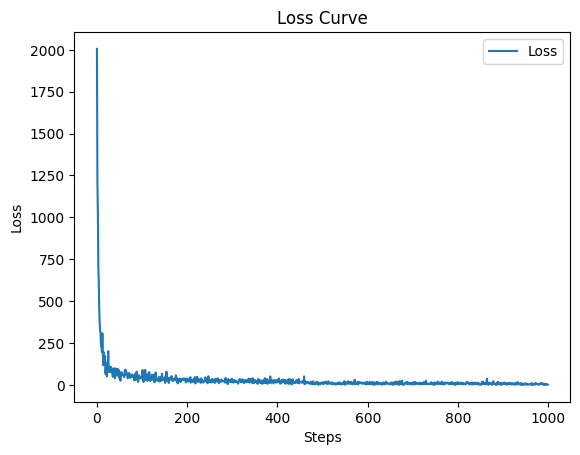

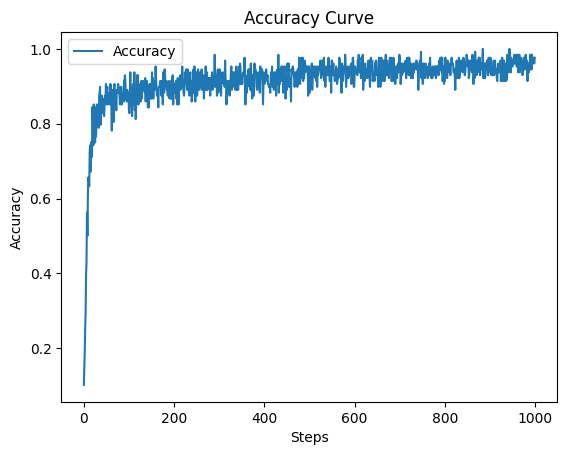

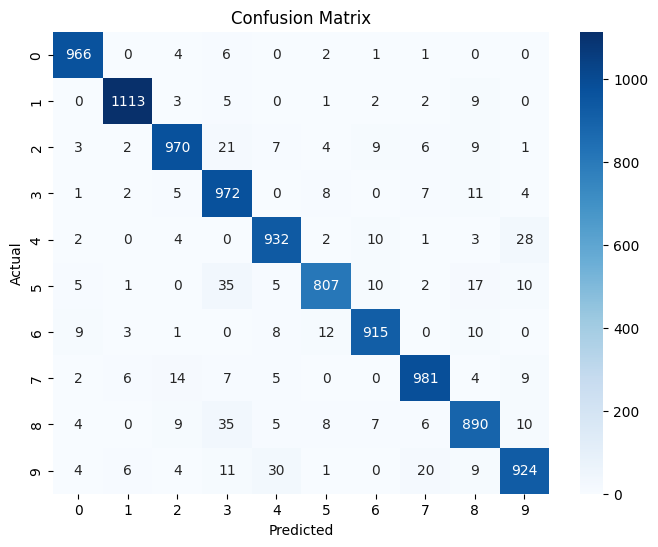

In [ ]:
init = tf.compat.v1.global_variables_initializer()

loss_history = []
accuracy_history = []

# Start training
with tf.compat.v1.Session() as sess:
    # Run the initializer
    sess.run(init)
    sess.run(iterator.initializer)

    for step in range(1, num_steps + 1):
        try:
            batch_x, batch_y = sess.run(next_element)
        except tf.errors.OutOfRangeError:
            sess.run(iterator.initializer)
            batch_x, batch_y = sess.run(next_element)
        # optimization (backprop)
        _, loss, acc = sess.run([train_op, loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
        loss_history.append(loss)
        accuracy_history.append(acc)

        if step % display_step == 0 or step == 1:
            print("Step {}: Minibatch Loss = {:.4f}, Training Accuracy = {:.3f}".format(step, loss, acc))

    print("Optimization Finished!")



    # Calculating Accuracy for test images
    test_iterator = tf.compat.v1.data.make_initializable_iterator(test_data)
    next_test_element = test_iterator.get_next()
    sess.run(test_iterator.initializer)
    test_acc = 0
    test_count = 0
    y_true, y_pred = [], []

    while True:
        try:
            test_images, test_labels = sess.run(next_test_element)
            acc, preds = sess.run([accuracy, tf.argmax(logits, 1)], feed_dict={X: test_images, Y: test_labels})
            y_true.extend(np.argmax(test_labels, axis=1))
            y_pred.extend(preds)
            test_acc += acc
            test_count += 1
        except tf.errors.OutOfRangeError:
            break
    test_acc /= test_count
    print("Testing Accuracy:", test_acc)



# Loss Curve

    plt.figure()
    plt.plot(loss_history, label='Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

# Accuracy Curve

    plt.figure()
    plt.plot(accuracy_history, label='Accuracy')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Confusion Matrix shows classification performance.

**Trains & evaluates** on MNIST dataset  
**Visualizes**:

-   Loss curve
-   Accuracy curve
-   Confusion matrix
